In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk import bigrams
from nltk import ngrams
from nltk import FreqDist
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests

In [2]:
df1 = pd.read_csv('./dataset/files/01.csv', encoding = 'utf-8', sep=';')
df2 = pd.read_csv('./dataset/files/02.csv', encoding = 'utf-8', sep=';')
df3 = pd.read_csv('./dataset/files/03.csv', encoding = 'utf-8', sep=';')
df4 = pd.read_csv('./dataset/files/04.csv', encoding = 'utf-8', sep=';')
df5 = pd.read_csv('./dataset/files/05.csv', encoding = 'utf-8', sep=';')
df6 = pd.read_csv('./dataset/files/06.csv', encoding = 'utf-8', sep=';')
df7 = pd.read_csv('./dataset/files/07.csv', encoding = 'utf-8', sep=';')
df8 = pd.read_csv('./dataset/files/08.csv', encoding = 'utf-8', sep=';')
df9 = pd.read_csv('./dataset/files/09.csv', encoding = 'utf-8', sep=';')
df10 = pd.read_csv('./dataset/files/10.csv', encoding = 'utf-8', sep=';')
df11 = pd.read_csv('./dataset/files/11.csv', encoding = 'utf-8', sep=';')
df12 = pd.read_csv('./dataset/files/12.csv', encoding = 'utf-8', sep=';')
df13 = pd.read_csv('./dataset/files/13.csv', encoding = 'utf-8', sep=';')
df14 = pd.read_csv('./dataset/files/14.csv', encoding = 'utf-8', sep=';')
df15 = pd.read_csv('./dataset/files/15.csv', encoding = 'utf-8', sep=';')
df16 = pd.read_csv('./dataset/files/16.csv', encoding = 'utf-8', sep=';')
df17 = pd.read_csv('./dataset/files/17.csv', encoding = 'utf-8', sep=';')
df18 = pd.read_csv('./dataset/files/18.csv', encoding = 'utf-8', sep=';')
df19 = pd.read_csv('./dataset/files/19.csv', encoding = 'utf-8', sep=';')
df20 = pd.read_csv('./dataset/files/20.csv', encoding = 'utf-8', sep=';')

result1 = df1.append(df2)
result2 = result1.append(df3)
result3 = result2.append(df4)
result4 = result3.append(df5)
result5 = result4.append(df6)
result6 = result5.append(df7)
result7 = result6.append(df8)
result8 = result7.append(df9)
result9 = result8.append(df10)
result10 = result9.append(df11)
result11 = result10.append(df12)
result12 = result11.append(df13)
result13 = result12.append(df14)
result14 = result13.append(df15)
result15 = result14.append(df16)
result16 = result15.append(df17)
result17 = result16.append(df18)
result18 = result17.append(df19)
result_final = result18.append(df20)

dataset = result_final

dataset = dataset.dropna(axis = 0)
dataset.isnull().sum()
dataset = dataset.reset_index()

In [3]:
dataset.to_csv('./dataset.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [4]:
dataset = pd.read_csv('./dataset.csv', encoding = 'utf-8', sep=';')

# search_values = ['PRÉ', 'CANDIDATURA',  'EXPERIÊNCIA', 'ADMINISTRATIVA', 'ÚRSULA VIDAL']
search_values_comments = ['roubou', 'datena', 'Datena', 'roubar', 'vergon', 'casa', 'respiradores', 'barbalho', 'Barbalho', 'Helder', 'Hélder', 'Governador', 'governador', 'PF', 'federal', 'na casa', 'polícia', 'policia', 'governo']
search_comments = dataset.loc[dataset.comentario.str.contains(' | '.join(search_values_comments))]

search_values_post = ['governador', 'Governador', 'Helder', 'barbalho', 'Barbalho', 'PF', 'Federal', 'Datena', 'respiradores', 'governo']
search_post = dataset.loc[dataset.postagem.str.contains(' | '.join(search_values_post))]
# df[df.name.str.contains('|'.join(search_values ))]
search = search_post.append(search_comments)
search.drop_duplicates(subset ='comentario', keep = False, inplace = True) 
search


,index,postagem,nome,comentario,curtidas,data,link
417,437,Assista ao vivo a coletiva do Governador Helde...,Juscelina Vasconcelos,"Todos nós somos sujeitos a lei , nenhum cargo ...",10,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
420,440,Assista ao vivo a coletiva do Governador Helde...,Raymundo Marinho Neto,As investigações agora que começaram é vocês d...,14,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
422,442,Assista ao vivo a coletiva do Governador Helde...,Denize Cunha,E o empréstimo internacional é pra que mesmo??,4,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
426,446,Assista ao vivo a coletiva do Governador Helde...,Reginaldo Cardoso Jr.,Quero saber quando ele vai pagar a primeira pa...,1,10/6 22:4 há 3 horas,https://m.facebook.com/story.php?story_fbid=31...
519,539,Assista ao vivo a coletiva do Governador Helde...,Bruno Capello,"Sai fora, DOL. Sem credibilidade nenhuma!",18,10/6 22:4 há 4 horas,https://m.facebook.com/story.php?story_fbid=31...
...,...,...,...,...,...,...,...
49053,319,Atenção Prefeitura Municipal Ministério Públi...,Adrianoo Silvaa,Em vez da polícia fechar comércio deveria tá ...,0,11/6 3:5 7 de jun às 21:45,https://m.facebook.com/story.php?story_fbid=36...
49109,376,#CORONAVÍRUS Agora são 4 352 casos confirmado...,Esmeralda Santos,Eta que a polícia federal precisa urgentemente...,1,11/6 3:5 7 de jun às 17:51,https://m.facebook.com/story.php?story_fbid=36...
49137,404,#CORONAVÍRUS Só nesta sexta-feira (5) foram re...,Margo Jardim,"Quem vence é a maioria,não estavam lutando pel...",0,11/6 3:5 6 de jun às 16:25,https://m.facebook.com/story.php?story_fbid=35...
49138,405,#CORONAVÍRUS,Joaci Cunha Cunha,Eta polícia federal muito bem parabéns pelo se...,0,11/6 3:5 6 de jun às 17:15,https://m.facebook.com/story.php?story_fbid=35...


In [5]:
search.to_csv('./search.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [6]:
dataset = search

In [7]:
# Lista de stopWords
stop_words = pd.read_csv('./dataset/stopwords.txt', sep=" ", header=None)
# Lista de Comentários
dataset_phrases = dataset['comentario']

In [8]:
# Remover stopWords de comentários
def removeStopWords(text):
    new_dataset_phrases = []
    for phrase in text:
        x = phrase.lower()
        remove_stop = [w for w in x.split() if w not in stop_words.values]
        remove_stop = [x for x in remove_stop if 'http' not in x ]
#         remove_stop = [w for w in x.split() if w not in stop_words]
        new_dataset_phrases.append(remove_stop)
    return new_dataset_phrases

In [9]:
# print(removeStopWords(dataset_phrases))
dataset_no_stopwords = removeStopWords(dataset_phrases)

In [10]:
def toStemmer(text):
    stemmer = nltk.stem.RSLPStemmer()
    phrases_stemmer = []
    for phrases in text:
        with_stemmer = [ str(stemmer.stem(p)) for p in phrases.split() if p not in stop_words.values]
        phrases_stemmer.append(with_stemmer)
    return phrases_stemmer

In [11]:
def listWords(text):
    all_words = []
    for word in text:
        all_words.extend(word)
    return all_words
        

In [12]:
list_of_words = listWords(dataset_no_stopwords)

In [13]:
wrd = [w for w in list_of_words if w not in stop_words]
# wrd

In [14]:
def associacoes(grams, n):
    n_grams = list(ngrams(wrd, n))
    n_grams = FreqDist(n_grams)
    n_grams = n_grams.most_common(1000)
    return n_grams

In [47]:
ass_two = associacoes(wrd, 2)

def printAssValues(array):
    final_array = []
    for x in array:
        a = str(x[0][0] + "," + x[0][1] + "," + str(x[1]))
        final_array.append(a)
    return final_array

two_words = printAssValues(ass_two)
two_words[0:15]

['polícia,federal,93',
 'governo,federal,63',
 'fica,casa,59',
 'ficar,casa,56',
 'pf,casa,34',
 'governo,estado,32',
 'helder,barbalho,28',
 'dentro,casa,27',
 'operação,pf,25',
 '750,mil,23',
 'casa,governador,23',
 'casa,caiu,22',
 'quero,saber,21',
 'dinheiro,público,20',
 'governador,helder,20']

In [48]:
ass_tree = associacoes(wrd, 3)
    
def printAssTreeValues(array):
    final_array = []
    for x in array:
        a = str(x[0][0] + ", " + x[0][1] + ", " + x[0][2] + ", " + str(x[1]))
        final_array.append(a)
    return final_array

tree_words = printAssTreeValues(ass_tree)
tree_words[0:15]

['polícia, federal, casa, 12',
 'mi, mi, mi, 9',
 'junior, lucena, lucena, 9',
 'lucena, lucena, junior, 9',
 'casa, peter, cassol,, 9',
 'peter, cassol,, secretário-adjunto, 9',
 'cassol,, secretário-adjunto, gestão, 9',
 'secretário-adjunto, gestão, administrativa, 9',
 'gestão, administrativa, secretaria, 9',
 'administrativa, secretaria, saúde, 9',
 'tita, o., tita, 8',
 'reyson, nogueira, tj, 8',
 'pf, casa, governador, 8',
 'pf, pf, pf, 8',
 'kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, 7']

In [49]:
ass_four = associacoes(wrd, 4)
    
def printAssFourValues(array):
    final_array = []
    for x in array:
        a = str(x[0][0] + ", " + x[0][1] + ", " + x[0][2] + ", " + x[0][3] + ", " + str(x[1]))
        final_array.append(a)
    return final_array

four_words = printAssTreeValues(ass_four)
four_words[0:15]

['junior, lucena, lucena, 9',
 'casa, peter, cassol,, 9',
 'peter, cassol,, secretário-adjunto, 9',
 'cassol,, secretário-adjunto, gestão, 9',
 'secretário-adjunto, gestão, administrativa, 9',
 'gestão, administrativa, secretaria, 9',
 'kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, kkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk, 6',
 'mi, mi, mi, 6',
 'pf, pf, pf, 6',
 'polícia, federal, apreendeu, 5',
 'apreendeu, r$, 748, 5',
 'r$, 748, mil, 5',
 '748, mil, casa, 5',
 'mil, casa, peter, 5',
 '4), escândalo, álcool, 5']

In [50]:
# list_of_words
wrd_dist = FreqDist(list(list_of_words))
wrd_ranking = wrd_dist.most_common(1000)
# wrd_ranking
# for wrd in wrd_ranking:
#     print(wrd[0] + ",", four[1])
    
def words_Ranking(array):
    final_array = []
    for x in array:
        a = str(x[0] + ", " + str(x[1]))
        final_array.append(a)
    return final_array
word_ranking = words_Ranking(wrd_ranking)
word_ranking[0:15]

['casa, 745',
 'governo, 526',
 'governador, 439',
 'povo, 378',
 'pf, 339',
 'dinheiro, 247',
 'pessoas, 244',
 'polícia, 212',
 'federal, 203',
 'deus, 161',
 'presidente, 158',
 'ficar, 149',
 'bem, 148',
 'pará, 140',
 'estado, 129']

In [52]:
postagens = list(dataset['postagem'])
ranking_post = FreqDist(postagens)
ranking_pp = ranking_post.most_common(1000)
number_special = int(1000 - len(ranking_pp))
ranking_postagens = [''] * number_special
ranking_postagens = ranking_pp + ranking_postagens
# len(ranking_postagens)

In [54]:
mor_love = list(dataset['curtidas'])
oaiwdl = mor_love.sort(reverse=True)
oaiwdl
# print(oaiwdl)

In [55]:
final_results = pd.DataFrame()
final_results['Ranking de palavras'] = wrd_ranking
final_results['Ranking de Associações de duas palavras'] = ass_two
final_results['Ranking de Associações de tres palavras'] = ass_tree
final_results['Postagem Mais comentadas'] = ranking_postagens

In [85]:
# for postagem in ranking_postagens:
#     print(postagem[0] + ", Comentários: ",postagem[1])
    
def post_Ranking(array):
    final_array = []
    for x in array:
        a = str(x)
        final_array.append(a)
    return final_array

post_ranking = post_Ranking(ranking_postagens)
post_ranking[0:5]


["('O presidente chamou os manifestantes e críticos ao governo de ‘terroristas’  ‘viciados’  ‘bando de marginais’ e ‘marginais de preto’ ', 266)",
 "('Assista ao vivo a coletiva do Governador Helder Barbalho ', 229)",
 "('O governo teria ainda usado critérios não técnicos na distribuição de verbas de publicidade ', 202)",
 '(\'Bolsonaro chamou novamente de "marginais" integrantes de grupos contrários ao seu governo \', 160)',
 '(\'Bolsonaro afirmou que os manifestantes que se opõem a seu governo "geralmente são marginais  maconheiros  desocupados que não sabem o que é economia  o que é trabalhar para ganhar seu pão de cada dia" \', 139)']

In [86]:
final_results.to_csv('./final_results.csv', encoding='utf-8-sig', index=None, header=True, sep=';')

In [87]:
ddadawdaw = [[w] for w in list_of_words]
# ddadawdaw

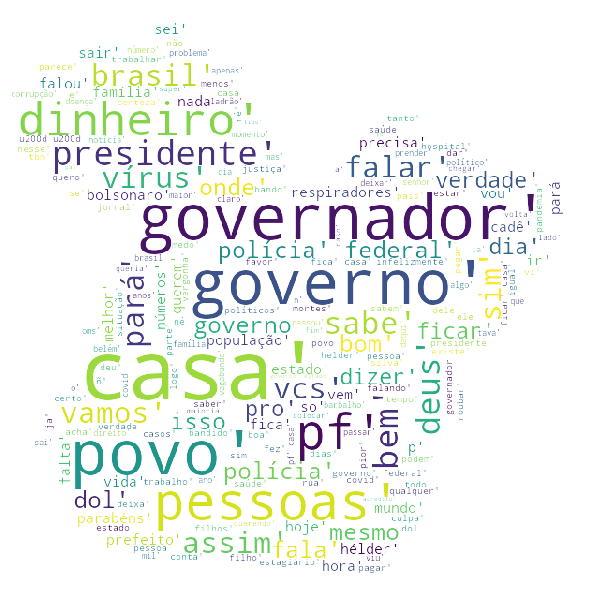

In [88]:
text = str(ddadawdaw)
text
# mask = np.array(Image.open(requests.get('./dataset/image.png', stream=True).raw))
mask = np.array(Image.open('./dataset/image.png'))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color="rgba(255, 255, 255, 0)", mode="RGBA", stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('./graph.png', transparent=True)
    plt.show()
#Run the following to generate your wordcloud
generate_wordcloud(mask)

In [89]:
emoction_training = pd.read_csv('./dataset/Tweets_Mg.csv',encoding='utf-8')

In [90]:
# separar frases e suas classes
frases_classificar = emoction_training["Text"].values
# frases_classificar
classes_classificar = emoction_training["Classificacao"].values
# classes_classificar

In [91]:
vectorizer = CountVectorizer(ngram_range = (1, 2))
freq_tweets = vectorizer.fit_transform(frases_classificar)

modelo = MultinomialNB()
modelo.fit(freq_tweets, classes_classificar)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [92]:
emoction_result = dataset
# emoction_result


In [94]:
dataset_emoction = emoction_result['comentario']
dataset_emoction = dataset_emoction.tolist()
dataset_emoction[0:5]

['Todos nós somos sujeitos a lei , nenhum cargo público nos exime de cumplir e respeita-la esse tipo de investigação vale para todos. ',
 'As investigações agora que começaram é vocês do dol, já chegaram a conclusão do inquérito. Te cuida dol, Ainda falta: Prendedor de gravata de ouro. Aluguel de ambulância. Cesta básica hiper faturara. Álcool em gel  Eita pohhaa  vai ter muita matéria pra vocês inventarem.',
 'E o empréstimo internacional é pra que mesmo??',
 'Quero saber quando ele vai pagar a primeira parcela aos fornecedores dos kits que foram distribuídos aos alunos da rede estadual pq os supermercados ainda não liberaram o segundo kit por ainda estarem esperando o pagamento da primeira...🙊🙊🙊😂😂😂',
 'Sai fora, DOL. Sem credibilidade nenhuma!']

In [95]:
freq_testes = vectorizer.transform(dataset_emoction)
emoction_results = modelo.predict(freq_testes)
# emoction_results

In [96]:
emoction_results = pd.DataFrame(emoction_results)
emoction_results.columns = ['Classificacao']
emoction_results
emoction_results[emoction_results.Classificacao == 'Negativo'].count()

Classificacao    1175
dtype: int64

In [97]:
emoction_results[emoction_results.Classificacao == 'Positivo'].count()

Classificacao    622
dtype: int64

In [98]:
emoction_results[emoction_results.Classificacao == 'Neutro'].count()

Classificacao    3789
dtype: int64

# GERAL

## Procura todos os comentário positivos negativos e neutros

In [99]:
# Pega todos os comentários
all_comments = dataset['comentario']
# Transforma todos os comentáriso em uma lista
all_comments = all_comments.tolist()
# Vetoriza todos os comentários
freq_all_comments = vectorizer.transform(all_comments)
# faz a predição de todos os comentários Negativos positivos neutros
all_comments_results = modelo.predict(freq_all_comments)
# all_comments_results

all_comments_results = pd.DataFrame(all_comments_results)
all_comments_results.columns = ['Classificacao']
all_comments_results
print('Negativo: ', all_comments_results[all_comments_results.Classificacao == 'Negativo'].count())
print('Positivo: ', all_comments_results[all_comments_results.Classificacao == 'Positivo'].count())
print('Neutro: ', all_comments_results[all_comments_results.Classificacao == 'Neutro'].count())

Negativo:  Classificacao    1175
dtype: int64
Positivo:  Classificacao    622
dtype: int64
Neutro:  Classificacao    3789
dtype: int64


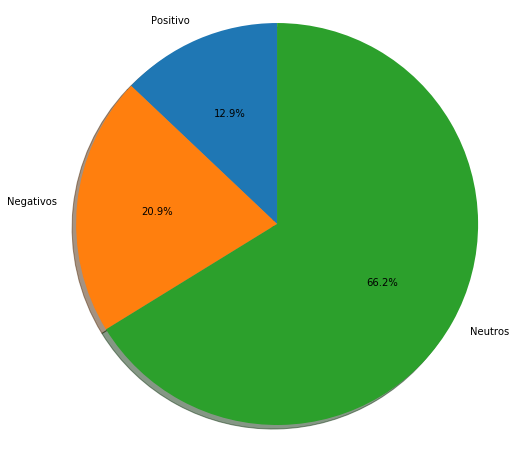

In [100]:
labels = 'Positivo', 'Negativos', 'Neutros'
sizes = [219, 353, 1121]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Contagem de gênero

In [101]:
first_names = dataset['nome']
all_first_names = []
for name in first_names:
    first_name = name.split()
    all_first_names.append(first_name[0])
    
# all_first_names
name_training = pd.read_csv('./dataset/grupos.csv', encoding = 'utf-8')
# name_training

# separar Nomes e suas classes
names_classificar = name_training["names"].values
# frases_classificar
gender_classificar = name_training["classification"].values
# classes_classificar
vectorizer_names = CountVectorizer(analyzer = "word")
freq_names = vectorizer_names.fit_transform(names_classificar)

modelo = MultinomialNB()
modelo.fit(freq_names, gender_classificar)


freq_name_testes = vectorizer_names.transform(all_first_names)
freq_name_testes = modelo.predict(freq_name_testes)
# len(freq_name_testes)

freq_name_testes = pd.DataFrame(freq_name_testes)

freq_name_testes.columns = ['Gender']
all_comments_results
print('M: ', freq_name_testes[freq_name_testes.Gender == 'M'].count())
print('F: ', freq_name_testes[freq_name_testes.Gender == 'F'].count())

M:  Gender    2919
dtype: int64
F:  Gender    2667
dtype: int64
